In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [3]:
df=sns.load_dataset("iris")

In [4]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
x=df.drop('species',axis=1)
y=df['species']

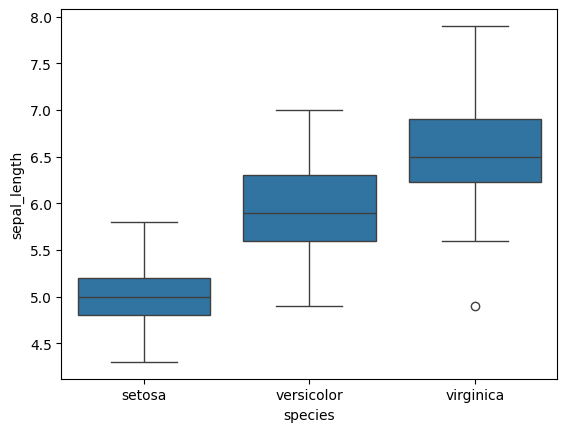

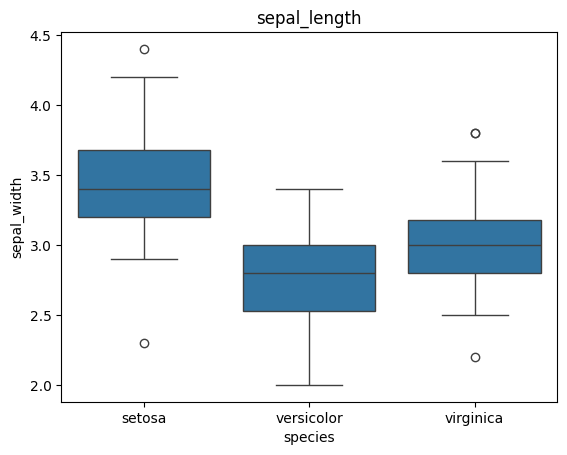

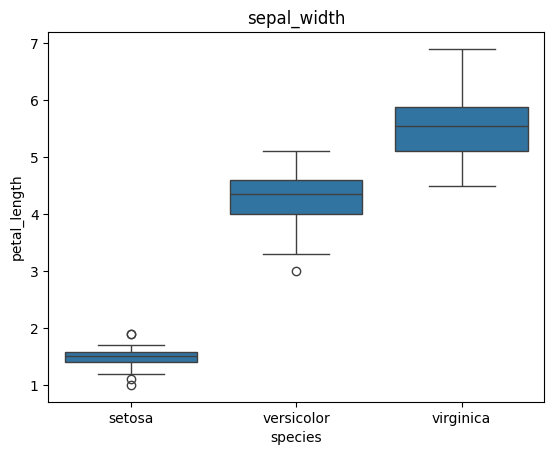

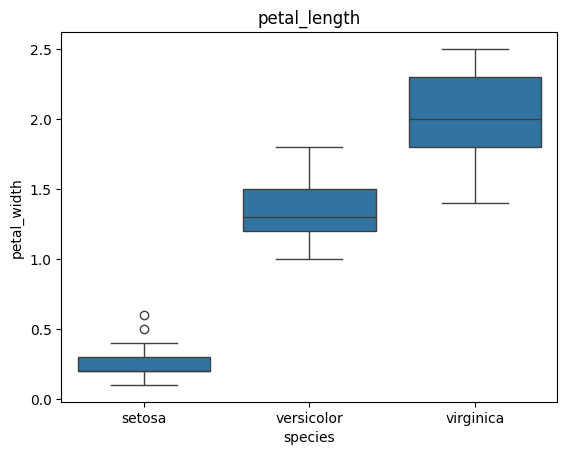

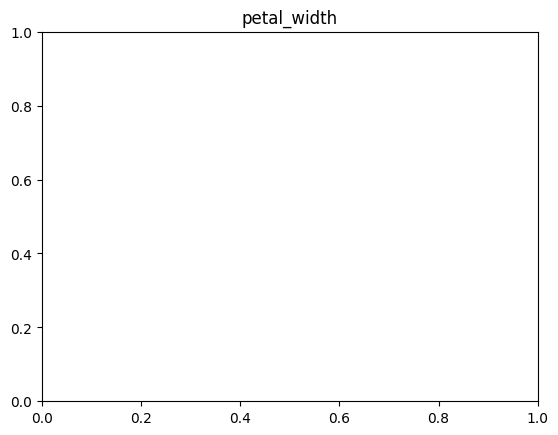

In [11]:
for i in x.columns:
  sns.boxplot(x=y,y=x[i])
  plt.show()
  plt.title(i)

In [22]:
for i in x.columns:
    q1 = x[i].quantile(0.25)
    q3 = x[i].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr

    filtr = x[i].loc[(x[i] > lower) & (x[i] < upper)]
    mean = filtr.dropna().mean()  # Ensure no NaN values

    # Use proper indexing to modify values
    x.loc[(x[i] > upper) | (x[i] < lower), i] = mean

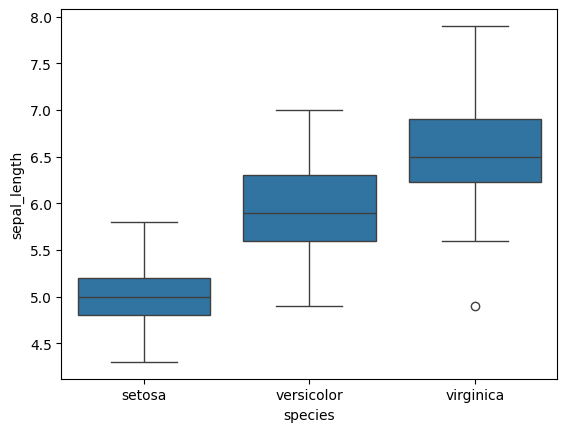

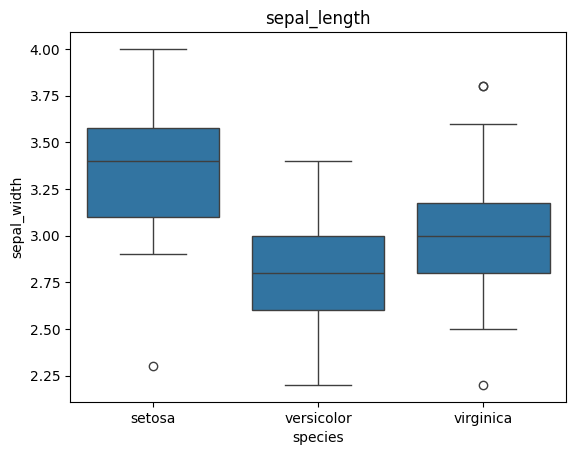

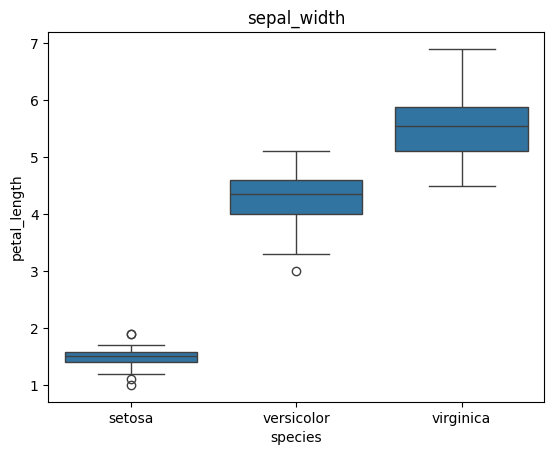

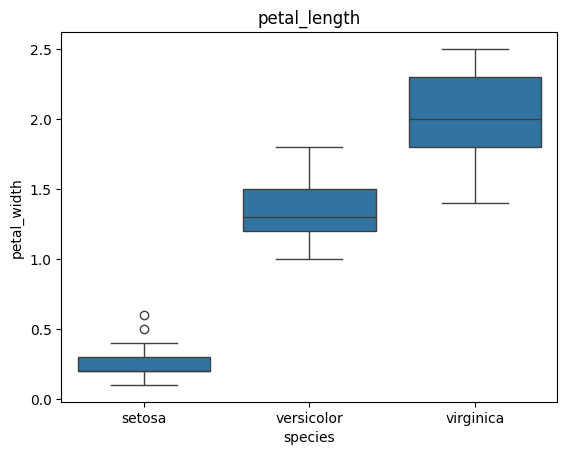

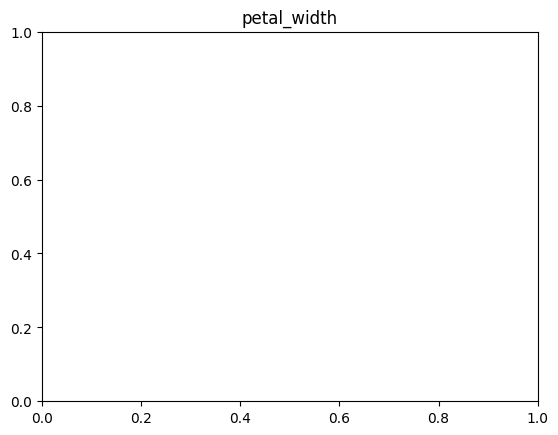

In [23]:
for i in x.columns:
  sns.boxplot(x=y,y=x[i])
  plt.show()
  plt.title(i)

In [26]:
encode=LabelEncoder()
ynew=encode.fit_transform(y)

In [27]:
ynew

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
xtr,xte,ytr,yte=train_test_split(x,ynew,test_size=0.3,random_state=15)

In [31]:
scaler=StandardScaler()
xtr_new=scaler.fit_transform(xtr)
xte_new=scaler.transform(xte)

In [32]:
print(xtr_new)

[[ 0.16979937 -0.08265031  0.58312541  0.77263595]
 [-1.75765296 -0.32630977 -1.33908854 -1.33113779]
 [-0.55299525 -0.08265031  0.4135183   0.37817837]
 [-0.43252948  1.135647   -1.39562425 -1.33113779]
 [ 1.01305976  0.64832808  1.09194675  1.16709353]
 [-0.19159794 -1.30094761  0.69619682  1.03560767]
 [ 0.53119668 -0.81362869  0.63966111  0.77263595]
 [ 2.21771747  1.86662539  1.65730379  1.29857939]
 [ 0.29026514 -0.08265031  0.470054    0.24669252]
 [ 0.29026514 -0.56996923  0.5265897  -0.0162792 ]
 [-0.43252948 -1.54460708  0.01776836 -0.14776506]
 [-1.03485833  1.135647   -1.22601713 -0.80519435]
 [-0.07113217 -0.81362869  0.07430407 -0.0162792 ]
 [ 0.65166245 -0.56996923  1.03541104  1.29857939]
 [ 0.53119668  0.89198754  1.03541104  1.5615511 ]
 [ 2.21771747 -0.08265031  1.31808957  1.43006525]
 [ 0.65166245  0.16100916  0.97887534  0.77263595]
 [-1.51672141  0.16100916 -1.28255284 -1.33113779]
 [-1.1553241  -1.30094761  0.4135183   0.64115009]
 [ 0.41073091 -2.031926    0.41

In [33]:
model=LogisticRegression()
model.fit(xtr_new,ytr)

LogisticRegression()

In [35]:
pred_train=model.predict(xtr_new)
pred_test=model.predict(xte_new)

In [36]:
acc_tr=accuracy_score(ytr,pred_train)
acc_te=accuracy_score(yte,pred_test)

In [38]:
print("accuracy on trainig data is:",acc_tr*100)
print("accuracy on test data is:",acc_te*100)

accuracy on trainig data is: 96.19047619047619
accuracy on test data is: 100.0


In [43]:
input=np.array([3,4,3,0.3]).reshape(1,-1)

x=scaler.fit_transform(input)
pred=model.predict(x)




In [44]:
print("prediction:",pred)

if pred==0:
  print("setosa")
elif pred==1:
  print("versicolor")
else:
  print("virginica")

prediction: [1]
versicolor
